In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center>Chapitre 1 : Représentation des données : types et valeurs de base</center></span>

## F. Les booléens

### Introduction historique

**Georges Boole** (1815–1864) était un **mathématicien** britannique qui a,entre autre, défini une représentation des opérations logiques à l’aide d’opérations mathématiques. On appelle cette modélisation **l’algèbre de Boole** et elle est à la **base du fonctionnement des ordinateurs** et plus généralement de tous les systèmes électroniques.

En effet, avec des **composants électroniques** élémentaires appelés **transistors**, on peut construire des circuits électroniques dont le fonctionnement **modélise parfaitement les opérations de bases définies dans l'algèbre de Boole**. Or, ces opérations de base, pourtant très simples, permettent en les combinant de **réaliser une addition** et partant de là, **n'importe quelle autre opération mathématique** plus complexe.
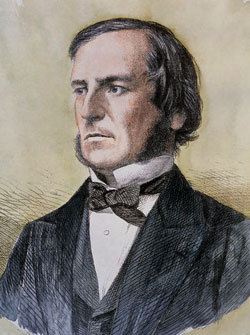


### I. L'algèbre de Boole

#### 1. Les postulats de base : opérateurs $et$, $ou$ et $non$

L’algèbre de Boole est basée sur un ensemble B de seulement 2 valeurs B = {0;1} sur lequel on définit **2 opérations** : $et$ et $ou$. On appelle **booléens** les éléments de B (0 et 1 donc).

**En logique**, le 0 et le 1 correspondent aux valeurs possibles de **propositions qui peuvent être fausses ou vraies**. Ainsi, $(a\,et\,b\,)=\,vrai$ si et seulement si “les deux propositions a et b sont vraies”. Alors que $(a\,ou\,b\,)=\,vrai$ dès que “au moins une des deux propositions a ou b est vraie”.

On définit également une transformation $non$ qui inverse la valeur d'une proposition : $non\,a=1$ si et seulement si " a est faux" et $non\,a=0$ si et seulement si "a est vrai".

**Remarque :** Tel que défini ci-dessus, $a\,ou\,b$ est vrai même si les deux propositions a et b sont vraies, on dit que c’est un **ou inclusif**. Il existe aussi l'opérateur **ou exclusif** ($XOR$) tel que $a\,XOR\,b =1$ si et seulement si "une seule des 2 propositions a ou b est vraie".

#### 2. Les tables de vérité

Puisqu’il y a peu de cas possibles, on peut définir ces opérations à l’aide de simples **tableaux montrant tous les résultats possibles**, qu’on appelle **tables de vérité** :

|$a$|$b$|$a$ et $b$|-----|$a$|$b$|$a$ ou $b$|-----|$a$|$non$ $a$|
|:-:|:-:|:--------:|-----|:-:|:-:|:--------:|-----|:-:|:-------:|
| 0 | 0 |     0    |-----| 0 | 0 |     0    |-----| 0 |    1    |
| 0 | 1 |     0    |-----| 0 | 1 |     1    |-----| 1 |    0    |
| 1 | 0 |     0    |-----| 1 | 0 |     1    |-----
| 1 | 1 |     1    |-----| 1 | 1 |     1    |-----

**Remarque** : Ces seules 10 règles de calcul constituent les postulats de l'algèbre de boole et suffisent à démontrer tout le reste.

#### 3. Propriétés des opérateurs

Par rapport à l'agèbre classique, l'opérateur $et$ est semblable à la multiplication, l'opérateur $ou$ à l'addition et la transformation $non$ à l'opposé.

Ainsi, de même qu'en algèbre classique, on peut démontrer la **commutativité**, **l'associativité** et la **distributivité** des opérateurs $et$ et $ou$.



**Démonstration**

Si la commutativité est évidente, la distributivité et l'associativité se démontrent facilement à partir des tables de vérité. Par exemple, pour montrer que $a\,et\,(b\,ou\,c) = (a\,et\,b)\,ou\,(a\,ou\,c)$, il suffit de remplir les tables de vérité ci-dessous et de **vérifier qu'elles donnent les mêmes résultats à chaque fois**.

|$a$|$b$|$c$|$b$ ou $c$|$a$ et ($b$ ou $c$)|----------|$a$|$b$|$c$|$a$ et $b$|$a$ et $c$|($a$ et $b$) ou ($a$ et $c$) |
|:-:|:-:|:-:|:--------:|:-----------------:|:--------:|:-:|:-:|:-:|:--------:|:--------:|:---------------------------:|
| 0 | 0 | 0 |          |                   |----------| 0 | 0 | 0 |          |          |                             |
| 0 | 0 | 1 |          |                   |----------| 0 | 0 | 1 |          |          |                             |
| 0 | 1 | 0 |          |                   |----------| 0 | 1 | 0 |          |          |                             |
| 0 | 1 | 1 |          |                   |----------| 0 | 1 | 1 |          |          |                             |
| 1 | 0 | 0 |          |                   |----------| 1 | 0 | 0 |          |          |                             |
| 1 | 0 | 1 |          |                   |----------| 1 | 0 | 1 |          |          |                             |
| 1 | 1 | 0 |          |                   |----------| 1 | 1 | 0 |          |          |                             |
| 1 | 1 | 1 |          |                   |----------| 1 | 1 | 1 |          |          |                             |



#### 4. Exercices

* Démontrer la distributivité de l'opérateur $ou$ : $a\,ou\,(b\,et\,c) = (a\,ou\,b)\,et\,(a\,ou\,c)$
* Démontrer les théorèmes de Morgan : $non\,(a\,ou\,b) = (non\,a)\,et\,(non\,b)$ et $non\,(a\,et\,b) = (non\,a)\,ou\,(non\,b)$
* Donner une expression de l'opérateur $xor$ à l'aide des opérateurs $et$, $non$ et $ou$.
* Montrer que $a\,ou\,(a\,et\,b)= a\,et\,(a\,ou\,b)=a$.
* Montrer que $a\,ou\,((non\,a)\,et\,b) = a\,ou\,b$
* Montrer que $(a\,ou\,b)\,et\,((non\,a)\,ou\,b) = b$
* Montrer que $(a\,xor\,b)\,ou\,(a\,et\,b) = a\,ou\,b$
* Montrer que $(a\,xor\,b)\,et\,(a\,ou\,(non\,b)) = a\,et\,(non\,b)$


#### 5. Vérification à l'aide de  Python
La fonction `table2` ci-dessous permet d'afficher la table de verité d'une expression booléene à 2 variables dont le nom est fourni en argument. Cette expression doit être définie par ailleurs comme dans les exemples ci-dessous. Pour plus de praticité, on définit également la fonction `non()` équivalente à `not` mais qui renvoie 0 ou 1 quand son argument est 1 ou 0.

**A l'aide de ces fonctions et en créant les expressions nécessaires, vérifier les exercices précédents.**

In [3]:
def table2(expr):
    print("a", "b", "expr(a,b)")
    for a in range(2):
        for b in range(2):
            print(a, b, expr(a,b))
            
def non(a):
    if a == 0 : return 1
    if a == 1 : return 0
    
def expression(a,b):
    return a or (a and b)
table2(expression)
def expression2(a,b):
    return (a ^ b)
table2(expression2)

a b expr(a,b)
0 0 0
0 1 0
1 0 1
1 1 1
a b expr(a,b)
0 0 0
0 1 1
1 0 1
1 1 0


#### 6. L'implication logique

On peut aussi définir l'implication $a \Rightarrow b$ de la façon suivante :

|$a$|$b$|$a$ $\Rightarrow$ $b$|
|:-:|:-:|:-------------------:|
| 0 | 0 |           1         |
| 0 | 1 |           1         |
| 1 | 0 |           0         |
| 1 | 1 |           1         |

Cela signifie que **le seul cas où cette implication n'est pas possible est le cas $a$ est Vrai et $b$ est Faux**.

Si les deux sont vrais, l'implication est possible et si $a$ est faux, on ne sait rien sur $b$ qui peut être aussi bien vrai que faux.

**Application**

En logique, on sait que si $a \Rightarrow b$ alors on a $non(b) \Rightarrow non(a)$ mais pas $non(a) \Rightarrow non(b)$. Pour s'en convaincre, prenez $a="Il\,pleut"$ et $b="Le\,sol\,est\,mouillé"$. S'il ne pleut pas, rien ne vous garantit que le sol ne soit pas mouillé !

J'ai piqué cet exemple à la chaîne e-penser sur cette excellente [vidéo](https://youtu.be/lZQqr6Lwjhg) que je vous conseille fortement.

Pour le démontrer, vérifier que $(a \Rightarrow b)\,et\,((non\,b)\Rightarrow(non\,a)) = 1$.

### II. Les booléens et Python

En Python, les booléens sont représentés par les valeurs `True` et `False`.

Les opérations booléennes de bases sont `and`, `or` et `not`.

#### 2.1 Priorité des opérateurs booléens
Comme pour les opérations mathématiques classiques, **il y a des priorités sur les opérations booléennes**. Le `and` est prioritaire sur le `or` et le `not` est prioritaire sur les autres opérations (de même que l'opposé est prioritaire sur la multiplication qui est prioritaire sur l'addition).

**Exemples :**

In [9]:
print("Priorité du and sur le or :")
print(True or True and False)
print((True or True) and False)
print(True or (True and False))

print("Priorité du not sur le and :")
print(not False and False)
print(not (False and False))
print((not False) and False)

Priorité du and sur le or :
True
False
True
Priorité du not sur le and :
False
True
False


#### 2.2 Les booléens et les tests

La plupart du temps en Python, on obtient des booléens lorsque l'on fait des tests du type `a == b` ou `a < b` pour des boucles `while` ou des `if`.
Mais il existe d'autres tests qui donnent un résultat de type booléen et on peut aussi grouper des tests avec `and`, `or` et `not`.

**Exemples :**
* Comment tester directement si $a<b<c$ en Python ?
* Que renvoie `3 == 3 or x == y` ?
* Que renvoie `1 == 2 and x == y`?

#### 2.3 Python est paresseux avec les booléens
Pour des **raisons d'efficacité**, lorsque Python **évalue une expression booléenne**, il le fait de façon **paresseuse**.

C’est à dire que si la partie gauche d’un $o$r est vraie, il n’évalue pas la partie droite (le résultat sera vrai de toute façon). De même si la partie gauche d’un $and$ est fausse, la partie droite n’est pas évaluée (le résultat sera faux de toute façon).

Ainsi, bien qu'en tout logique les 2 tests suivants devraient renvoyer une erreur, puisqu'on essaie de diviser par zéro, Python ne bronche pas. Par contre, changez le $and$ en $or$, ou inversement, et vous aurez un message d'erreur.

In [13]:
x = 0
print(x == 0 or 0 < 1/x < 1)
print(x != 0 and 0 < 1/x < 1)

True
False


#### 2.4 Tout est booléen

La fonction `bool()` permet de convertir n'importe quelle valeur ou objet en booléen selon la règle suivante : **par défaut tout est vrai, sauf l'unique valeur définie comme fause pour un type donné**.

Concrètement, cela signifie que `bool(f)` ne renvoie faux que pour le nombre 0 ou une chaine de caractère vide.

**Attention** : La conversion en booléen peut aussi se faire de façon **implicite**. Cela peut être **pratique mais aussi dangereux**, voir exemple ci-dessous.

In [14]:
#Exemple de conversion implicite en booléen
def bonjour(nom):
    if nom:
        print("Bonjour", nom)
    else:
        print("Le nom est vide")
bonjour("toi")
bonjour("")
bonjour(1)
bonjour(0)

Bonjour toi
Le nom est vide
Bonjour 1
Le nom est vide


### Conclusion
Voilà qui termine ce premier chapitre sur la repésentation des données des types et valeurs de base.

Dans le prochain chapitre, nous nous intéresserons aux types construits.

Pour aller un peu plus loin, on peut faire le [TD suivant](TD_01_2.ipynb).